In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import glob

In [15]:
root_dir = '/data/defeng/luojing/datasets/'

In [16]:
# img_paths = glob.glob(os.path.join(root_dir,'imgs','*','*.png'))
img_paths = glob.glob(os.path.join(root_dir,'imgs','*.png'))
img_paths.sort()
img_paths[:5]

['/data/defeng/luojing/datasets/imgs/0.png',
 '/data/defeng/luojing/datasets/imgs/1.png',
 '/data/defeng/luojing/datasets/imgs/10.png',
 '/data/defeng/luojing/datasets/imgs/100.png',
 '/data/defeng/luojing/datasets/imgs/1000.png']

## 可视化

In [49]:
index=15

In [34]:
def get_corresponding_mask_path(img_path):
    temp = img_path.split('/')
    img_name = temp[-1][:-4]
    temp[-2] = 'masks'
    temp[-1] = img_name+'_mask'+'.png'
    
    return '/'.join(temp)

In [50]:
img = cv2.imread(img_paths[index])
mask = cv2.imread(get_corresponding_mask_path(img_paths[index]))

In [57]:
from PIL import Image
test = Image.open(get_corresponding_mask_path(img_paths[index])).convert('L')

In [51]:
mask_gray = cv2.cvtColor(mask,cv2.COLOR_RGB2GRAY)

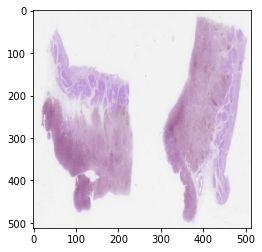

In [52]:
plt.imshow(img)

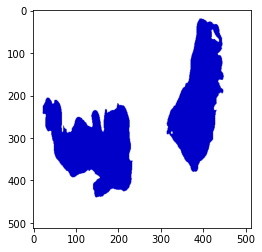

In [55]:
plt.imshow(mask)

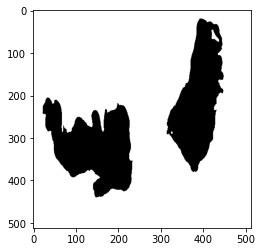

In [54]:
plt.imshow(mask_gray, cmap='gray')

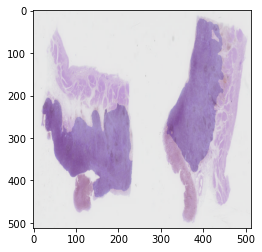

In [60]:
fusion_img = cv2.addWeighted(img,0.8,mask,0.15,0)
plt.imshow(fusion_img)

<Figure size 432x288 with 0 Axes>

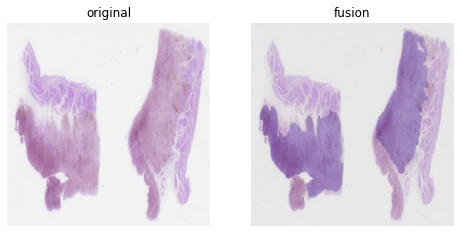

In [141]:
w=10
h=10

rows=1
cols=2

img_seq = [img, fusion_img]
name_seq = ['original', 'fusion']

fig=plt.figure()
figu,ax = plt.subplots(rows,cols,figsize=[8,8])
for i in range(rows*cols):
    # ind = start_with + i*show_every
    ax[int(i/rows)].set_title(name_seq[i])
    ax[int(i/rows)].imshow(img_seq[i],cmap='jet')
    ax[int(i/rows)].axis('off')
plt.show()


# for i in range(num):
#     fig, ax = plt.subplot(1,num,i+1) 
    
#     plt.axis('off')
#     plt.tight_layout()
#     ax.set_title(name_seq[i])
    
#     plt.imshow(img_seq[i])

In [240]:
def vis(img1,img2):
    size = 12
    import numpy as np
    import matplotlib.pyplot as plt

    my_image1 = img1
    my_image2 = img2

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[size,size])

    axes[0].set_title('original img')
    axes[0].axis('off')
    axes[1].set_title('probs')
    axes[1].axis('off')

    im1 = axes[0].imshow(my_image1)
    clim=im1.properties()['clim']
    # im2 = axes[1].imshow(my_image2, clim=clim)
    im2 = axes[1].imshow(my_image2,cmap='magma')

    fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.5)

    plt.savefig('./vis_result.png')
    plt.show()

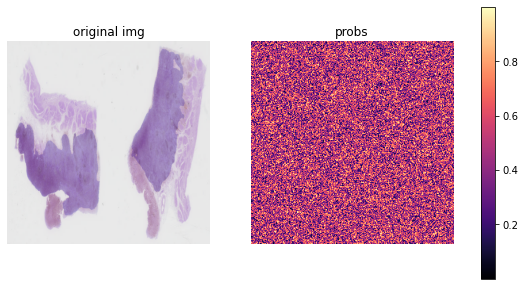

In [238]:
vis(fusion_img,data2)

In [215]:
i=20
t_img_path = './test_imgs/'
t_preds_path = './test_result/exp0/'
t_masks_path = 'test_masks/'

t_imgs = os.listdir(t_img_path)
t_preds = glob.glob(os.path.join(t_preds_path,'*.npy'))
t_masks = glob.glob(os.path.join(t_masks_path,'*.png'))

t_img = cv2.imread(os.path.join(t_img_path, t_imgs[i]))
t_img_name = t_imgs[i][:-4]

t_mask = cv2.imread(os.path.join(t_masks_path, t_img_name+'_mask'+'.png'), 0)
t_pred = np.load(os.path.join(t_preds_path, 'test_'+t_img_name+'.npy'))

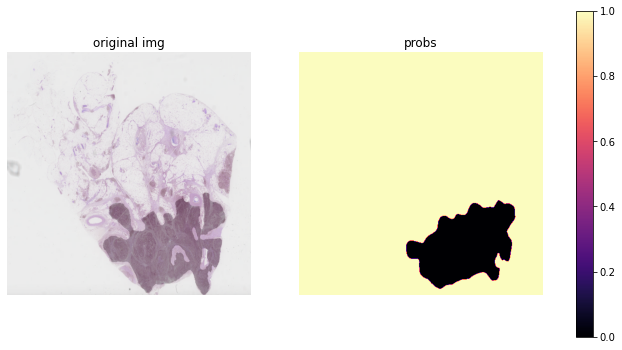

In [241]:
t_fusion_img = cv2.addWeighted(t_img,0.7,cv2.cvtColor(t_mask,cv2.COLOR_GRAY2BGR),0.25,2)
vis(t_fusion_img, t_pred)

In [41]:
len(img_paths), len(mask_paths)

(1006, 1006)

## create test dataset

In [93]:
root_dir = '/data/defeng/backup6-tranfer-UNet/data'
img_paths = glob.glob(os.path.join(root_dir,'imgs','*.png'))

if os.path.exists(os.path.join(root_dir,'test_imgs')):
    shutil.rmtree(os.path.join(root_dir,'test_imgs'), ignore_errors=True)
os.makedirs(os.path.join(root_dir,'test_imgs'))

if os.path.exists(os.path.join(root_dir,'test_masks')):
    shutil.rmtree(os.path.join(root_dir,'test_masks'), ignore_errors=True)
os.makedirs(os.path.join(root_dir,'test_masks'))

In [94]:
percent = 0.15
test_size = int(len(img_paths)*percent)

In [95]:
import numpy as np
test_indexs = np.random.choice(list(range(len(img_paths))), size=test_size, replace=False, p=None)
test_indexs[:5]

array([271, 121,  11, 259, 698])

In [96]:
import shutil

for idx in test_indexs:
    img_path = img_paths[idx]
    mask_path = get_corresponding_mask_path(img_path)
    print(img_path)
    
    temp = img_path.split('/')
    temp[-2] = 'test_imgs'
    new_img_path = '/'.join(temp)
    temp = mask_path.split('/')
    temp[-2] = 'test_masks'
    new_mask_path = '/'.join(temp)
    
    shutil.move(img_path, new_img_path)
    shutil.move(mask_path, new_mask_path)

/data/defeng/backup6-tranfer-UNet/data/imgs/673.png
/data/defeng/backup6-tranfer-UNet/data/imgs/41.png
/data/defeng/backup6-tranfer-UNet/data/imgs/446.png
/data/defeng/backup6-tranfer-UNet/data/imgs/292.png
/data/defeng/backup6-tranfer-UNet/data/imgs/573.png
/data/defeng/backup6-tranfer-UNet/data/imgs/409.png
/data/defeng/backup6-tranfer-UNet/data/imgs/477.png
/data/defeng/backup6-tranfer-UNet/data/imgs/772.png
/data/defeng/backup6-tranfer-UNet/data/imgs/570.png
/data/defeng/backup6-tranfer-UNet/data/imgs/581.png
/data/defeng/backup6-tranfer-UNet/data/imgs/26.png
/data/defeng/backup6-tranfer-UNet/data/imgs/977.png
/data/defeng/backup6-tranfer-UNet/data/imgs/810.png
/data/defeng/backup6-tranfer-UNet/data/imgs/517.png
/data/defeng/backup6-tranfer-UNet/data/imgs/81.png
/data/defeng/backup6-tranfer-UNet/data/imgs/330.png
/data/defeng/backup6-tranfer-UNet/data/imgs/194.png
/data/defeng/backup6-tranfer-UNet/data/imgs/43.png
/data/defeng/backup6-tranfer-UNet/data/imgs/463.png
/data/defeng/bac

In [92]:
len(glob.glob(os.path.join(root_dir, 'test_imgs','*'))), len(test_indexs)

(150, 150)

In [97]:
len(glob.glob(os.path.join(root_dir, 'imgs','*'))), len(test_indexs)

(856, 150)